<a href="https://colab.research.google.com/github/alixintong/btt-ai-know-your-customer/blob/bless/Cropping_and_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this cell allows access to our folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_path = '/content/gdrive/MyDrive/BTTAI_AmericanExpress1'

Mounted at /content/drive


In [ ]:
# cell for imports - add as needed
import torch 
import cv2
import numpy as np 
import pandas as pd
import os, os.path
import re
from fastai.vision.all import *

In [ ]:
# reference tutorial for classification: https://docs.fast.ai/23_tutorial.vision.html

In [ ]:
url= '/content/sample_data/letter001_BN.gt.csv'
df = pd.read_csv(url)
df.tail()

,point/0/_name,point/0/_x,point/0/_y,point/1/_name,point/1/_x,point/1/_y,point/2/_name,point/2/_x,point/2/_y,point/3/_name,point/3/_x,point/3/_y,_index,_rejected
347,bl,0.0,0.0,tl,0.0,0.0,tr,0.0,0.0,br,0.0,0.0,348,True
348,bl,0.0,0.0,tl,0.0,0.0,tr,0.0,0.0,br,0.0,0.0,349,True
349,bl,0.0,0.0,tl,0.0,0.0,tr,0.0,0.0,br,0.0,0.0,350,True
350,bl,0.0,0.0,tl,0.0,0.0,tr,0.0,0.0,br,0.0,0.0,351,True
351,bl,0.0,0.0,tl,0.0,0.0,tr,0.0,0.0,br,0.0,0.0,352,True


In [ ]:
# save _rejected column for binary classification
bin_doc = df['_rejected']
bin_doc

0      False
1      False
2      False
3      False
4      False
       ...  
347     True
348     True
349     True
350     True
351     True
Name: _rejected, Length: 352, dtype: bool

In [ ]:
path = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames'

files = get_image_files(path + "/letter001_combined")
len(files)

352

In [ ]:
# label function
def label_func(f):
  frame_num = f.split('.jpg')[0]
  frame_num = int(re.findall('[1-9]+', f)[1])
  rowNum = frame_num-1
  return bin_doc.loc[rowNum]

In [ ]:
# DataLoader object
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

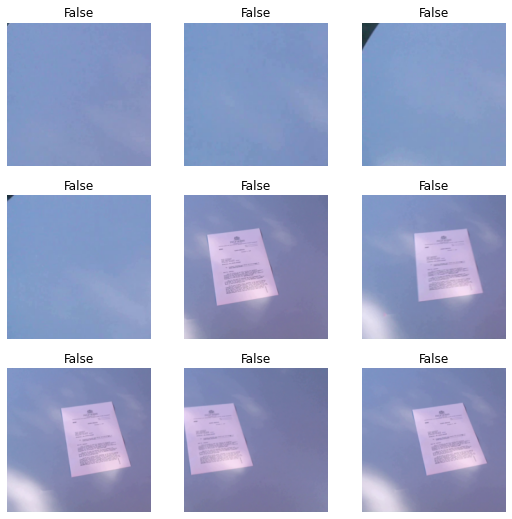

In [ ]:
dls.show_batch()

In [ ]:
# Create Learner with pretrained ResNet34
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:08


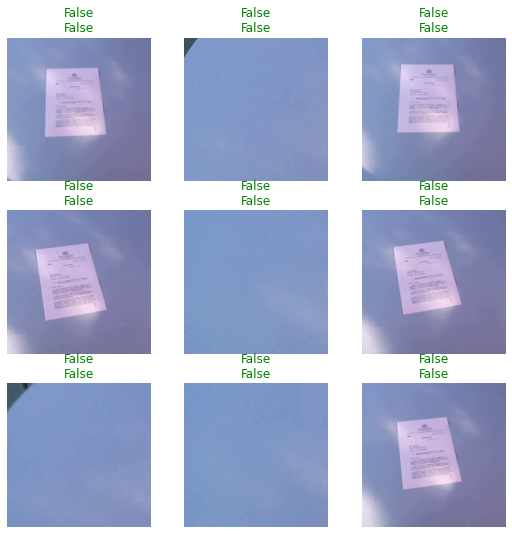

In [ ]:
learn.show_results()

In [ ]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([1.]))

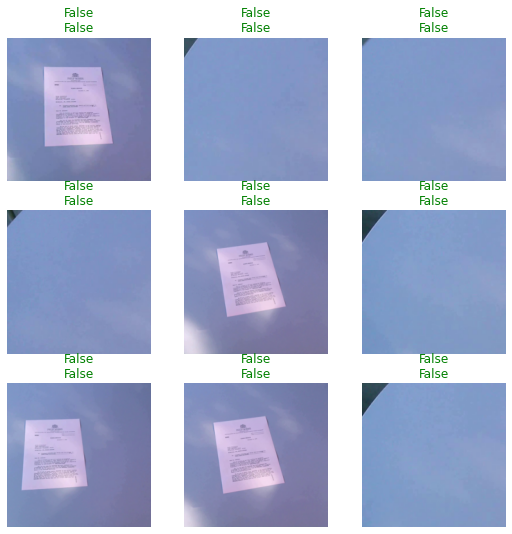

In [ ]:
learn.show_results()

Reading and Displaying images

In [ ]:
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage import io

im = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/datasheet001_frames/datasheet001_frames_00001.jpg'
img = cv2.imread(im) #read image
print(img.shape) # Print image shape
cv2_imshow(img) #show image

NameError: ignored

In [ ]:
img.shape[1]

1920

Cropping the actual document in the frame using OpenCv

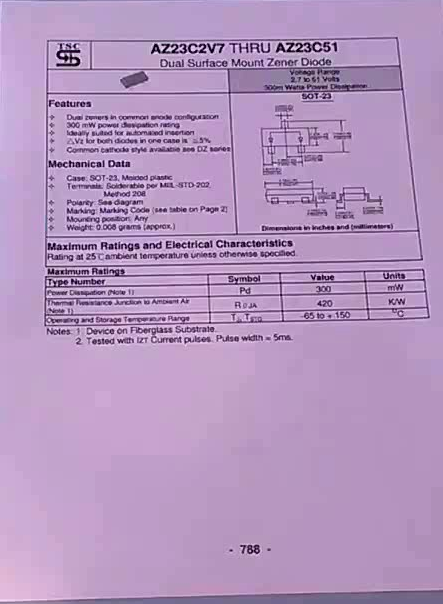

In [ ]:
# Cropping an image
cropped_image = img[201:805, 737:1180]

# Display cropped image
cv2_imshow(cropped_image)

In [ ]:
img1 = Image.open(im)
img2 = img1.crop((0, 0, 201, 335))
img2.save("img2.jpg")

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

path = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames'

In [ ]:
xmlPath = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample_groundtruth/background00_gt/letter001.gt.xml'

In [ ]:
for x in os.listdir(path):
  #img = cv2imread(x) #read image
  #img[201:805, 737:1180] #crop image
  cv2_imshow(x)

    

In [ ]:
import PIL
import os
import os.path
from PIL import Image

In [ ]:
path = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames'
for file in os.listdir(path):
  f_img = path + "/" +file
  img = Image.open(f_img)
  img = img.crop((0,0,500,500))
  img.save("/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames_no_doc/" + "no_doc_" + file)

In [ ]:
path = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/magazine001_frames'
for file in os.listdir(path):
  f_img = path + "/" +file
  img = Image.open(f_img)
  img = img.crop((0,0,500,500))
  img.save("/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/magazine001_frames_no_doc/" + "no_doc_" + file)

In [ ]:
path = '/content/sample_data/letter'

for file in os.listdir(path):
  f_img = path + "/" +file
  img = Image.open(f_img)
  img = img.crop((0,0,500,500))
  img.save("/content/sample_data/letter/no_docs/" + "no_doc" + file)

IsADirectoryError: ignored

In [ ]:
path = '/content/sample_data/letter'

for file in os.listdir(path):
  f_img = path + "/" +file
  img = Image.open(f_img)
  img = img.crop((0,0,500,500))
  img.save("/content/sample_data/letter/no_docs/" + "no_doc" + file)